In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fastag-fraud-detection-datesets-fictitious/FastagFraudDetection.csv


In [2]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [3]:
path  = '/kaggle/input/fastag-fraud-detection-datesets-fictitious/FastagFraudDetection.csv'

In [4]:
data = pd.read_csv(path)

In [5]:
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [6]:
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler
lbe = LabelEncoder() 
ms =MinMaxScaler()

In [7]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = lbe.fit_transform(data[col])

In [8]:
x = data.drop(['Transaction_ID','Timestamp','FastagID' , 'TollBoothID' ,'Geographical_Location','Vehicle_Plate_Number','Fraud_indicator' ] ,axis = 1)
y = data['Fraud_indicator']

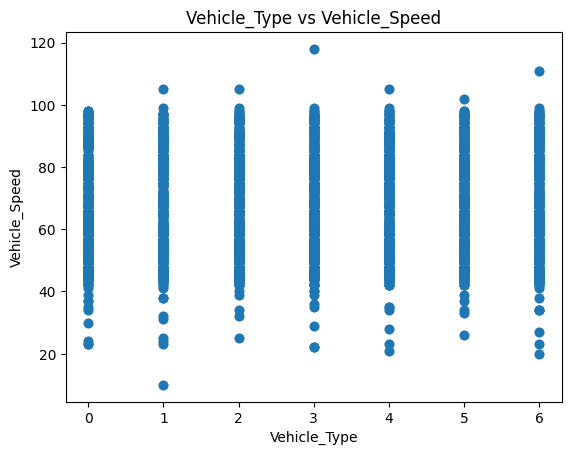

In [9]:
plt.title("Vehicle_Type vs Vehicle_Speed")
plt.xlabel("Vehicle_Type")
plt.ylabel("Vehicle_Speed")
plt.scatter(x.Vehicle_Type , x.Vehicle_Speed)

In [10]:
#x = ms.fit_transform(x)

In [11]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Fraud_indicator, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
ltr = LogisticRegression()

In [13]:
xtrain , xtest , ytrain , ytest = train_test_split(x, y ,random_state = 41 ,test_size = .30)

In [14]:
ltr.fit(xtrain , ytrain)

LogisticRegression()

In [15]:
ltr.score(xtrain , ytrain)

0.9848571428571429

In [16]:
ltr.score(xtest, ytest)

0.9866666666666667

In [17]:
from sklearn.metrics import classification_report ,confusion_matrix

In [18]:
print(classification_report(ytest , ltr.predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       296
           1       0.98      1.00      0.99      1204

    accuracy                           0.99      1500
   macro avg       0.99      0.97      0.98      1500
weighted avg       0.99      0.99      0.99      1500



In [19]:
cm = confusion_matrix(ytest , ltr.predict(xtest))
cm

array([[ 276,   20],
       [   0, 1204]])

In [20]:
import seaborn as sn

<Axes: >

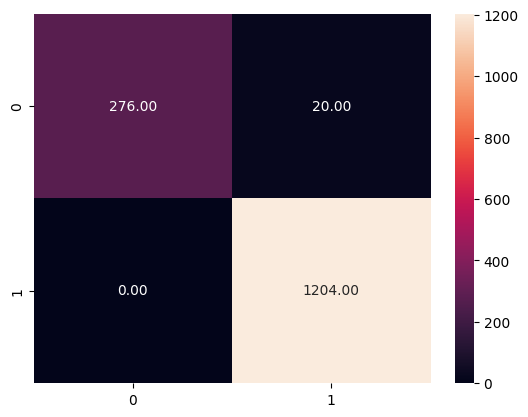

In [21]:
sn.heatmap(data = cm , annot = True , fmt=".2f")